# Mircosoft Movie studio overview

For this project, I will use exploratory data analysis to generate insights for my client Microsoft corporation to generate ideas and a report on an upcoming movie studio

Specifically, this project will cover:

* A non non-technical presentation
* A Jupyter Notebook
* A GitHub repository


## `Business Problem`
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.



### `This Notebook is divided into 5 main Parts:`

#### `1. Business Understanding`

#### `2. Data Preparation`

#### `3. Data Understanding`

#### `4. Data Analysis`

#### `5. Visualization`


# Mircosoft Movie studio: Part 1 Business Understanding

#### `1. Business Understanding Introduction`
Introduction

• This movie studio pitch is a presentation where I use data on previous films to pitch ideas to a movie studio division  to Microsoft for funding and production support.

• This pitch is will also be delivered in the form of a slide presentation, highlighting the key elements of the market analysis, and potential audience appeal.

• The goal of the pitch is to convince the Microsoft's movie studio of a film project is worth investing in and has the potential for commercial success.


 The primary objective is to empower the head of Microsoft's new movie studio with actionable insights derived from a comprehensive analysis of existing trends, enabling informed decision-making on the types of films to produce. This exploration involves understanding key factors contributing to a movie's success, such as genres, release dates, and production budgets.

`My key areas is to pitch the new Microsoft Movie Studio about:`
1. The type of film they should be making (using data)
2. The ideal movie budget
3. The ideal director they should hire

#### `Section2. Data Preparation & Anlysis`

To undertake a thorough analysis, relevant data needs to be collected and prepared for exploration. The chosen dataset, comprising information on movie budgets, gross revenues, release dates, and other pertinent details, will be cleaned and organized. Data cleaning will involve addressing missing values, handling duplicates, and ensuring consistency in data types. Feature engineering may be employed to create new variables that could enhance the analysis. The prepared dataset will serve as the foundation for subsequent stages of exploration and analysis.

### Here I shal begin by Importing the nesesary libaries Pandas and SQLite

In [1]:
import os
import pandas as pd
import sqlite3

### Next we will begin to import the nessary Data into our working notebook

bom_movie_gross - From Box Office Mojo is the Gross revenue sales Data of modern movie

rt_movie_info - From Rotten Tomatoes this Data contains movie review information

tn_movie_budgets - From The Numbers, this Data set contains major movie budgets

imdb_data - From IMDB (the internet movie Database) this SQL lite database contains several information about movie Data



In [3]:
# Loading the data
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
rt_movie_info = pd.read_csv('rt.movie_info.tsv', sep='\t')
#rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding='utf-8')

tmdb_movies = pd.read_csv('tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')


imdb_data = os.path.join('imdb.sqlite')
# Connect to SQLite database
imdb_conn = sqlite3.connect(imdb_data)
cursor = imdb_conn.cursor()



#### `Section3: Data Understanding`
Introduction


In this repository under the file path `.csv, and .sqlite` is file data containing the Project dataset. This is the same dataset many filmakers, and movie studios use to make informed decisions in the film industry.

The features of interest for this analysis will be:

**IMDB SQLite3**: `Data from the IMDB Database`

**tn.movie_budgets.csv:** `Movie grade (data) including production budgets, and gross revenue`

**bom.movie_gross.csv:** `Financial Data on various movies`

### Next we will begin to import the nessary Data into our working notebook

First things first IMDB is a great place to start so first

In [4]:
table_query1 = """
SELECT name
FROM sqlite_master
WHERE type='table';
"""
# Use the line below to check your query's output
pd.read_sql(table_query1, imdb_conn).head()

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [ ]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor.execute(tables_query)

# Fetch all the table names
tables = cursor.fetchall()

# Display the tables
for table in tables:
    print(table[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


Here I'm just trying to find relevant informatoion using the Data sources on the types of Films Microsoft Movie Studio's should develop. I'm filtering though the IMDB data


In [ ]:
# Define the query for highly rated popular movies
highly_rated_movies_query = """
SELECT *
FROM movie_ratings
WHERE averagerating >= 8.5 AND numvotes >= 1000
ORDER BY averagerating DESC, numvotes DESC;
"""

# Use pandas to read the results into a DataFrame
highly_rated_movies_df = pd.read_sql(highly_rated_movies_query, imdb_conn)

# Display the DataFrame
print(highly_rated_movies_df)

      movie_id  averagerating  numvotes
0    tt7131622            9.7      5600
1    tt6058226            9.6      2604
2    tt4131686            9.6      1339
3    tt5963218            9.5      6509
4    tt7738784            9.4      9629
..         ...            ...       ...
104  tt8032912            8.5      1224
105  tt4085696            8.5      1109
106  tt1809387            8.5      1106
107  tt4943992            8.5      1063
108  tt7580570            8.5      1040

[109 rows x 3 columns]


### Data Understanding: Finding the most popular movies and patterns

In this section I aim to find what the most popular moves are, in addition I want to find the most highly rated popular movies

So, I shall query the IMDB SQL database to find

**Highly rated movies**: `Movies with a rating of 8.5 (85% rating and higher)`

**Popular Movies**: `Movies more than 5000 votes`

In [7]:
# Define the query to join the tables and get highly rated popular movies
combined_query = """
SELECT mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres,
       mr.averagerating, mr.numvotes
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mr.averagerating >= 8.5 AND mr.numvotes >= 5000
ORDER BY mr.numvotes DESC, mr.averagerating DESC
LIMIT 50;
"""

# Use pandas to read the results into a DataFrame
combined_df = pd.read_sql(combined_query, imdb_conn)

# Display the DataFrame
#print(combined_df)
pd.read_sql(combined_query, imdb_conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
2,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343
3,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916
5,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135
6,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",8.5,210869
7,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",8.5,123638
8,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",9.3,100568
9,tt1424432,Senna,Senna,2010,106.0,"Biography,Documentary,Sport",8.6,55318


**Section Conclusion**: 

`Here I tried to find out the top movies by querying the IMDB database to find blockbusters:`

My definition of a blockbuster in this context is a movie with more than 5000 votes and with a rating higher that 8.5 


#### `Section4: Data Understanding`
Introduction


With a comprehensive understanding of the dataset, the analysis phase will delve deeper into identifying factors that significantly impact a movie's success. 

Correlation analyses will be conducted to assess relationships between variables, while statistical tests may be employed to validate hypotheses. Machine learning models, if applicable, may be employed to predict box office performance based on selected features. 

The analysis will aim to uncover patterns, preferences, and trends that can guide decision-making for Microsoft's movie studio.

**IMDB SQLite3**: `Data from the IMDB Database`

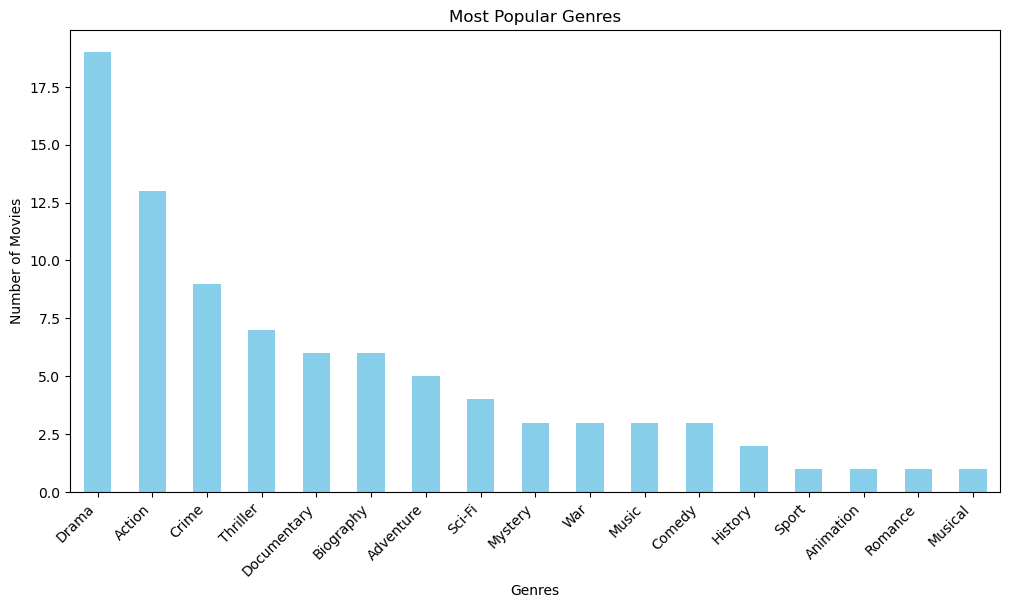

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the combined_df DataFrame available

# Step 1: Extract the genres column
genres_series = combined_df['genres']

# Step 2: Split the genres string into individual genres
all_genres = [genre.split(',') for genre in genres_series]

# Step 3: Flatten the list of genres
flat_genres = [genre.strip() for sublist in all_genres for genre in sublist]

# Step 4: Count the occurrences of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Plot the results
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()



**Drama genre?**

From this bar chat (above), here we can see that a drama is the most popular genre in the film industry at the moment. However we need to find out if this genre is indeed the best move that the new Microsoft Movie Studio should create

#### `Section5. Visualization & Even more Data Understanding`

To effectively communicate insights, visualization techniques will be employed to present key findings in a clear and compelling manner. Visual representations, including bar charts, line graphs, and heatmaps, will be used to highlight trends, distributions, and correlations within the data. These visualizations will facilitate a more intuitive understanding of the data and aid stakeholders in making informed decisions regarding the types of films Microsoft should consider producing.

This structured approach will guide the project, ensuring a systematic and comprehensive exploration of the data to derive actionable insights for Microsoft's new movie studio.

In the previous section I found out that the 'Drama' genre was the most popular type of film to make. 

Here ->

`I want to find out using the previous dataframe and via data visualization if Drama indeed is the best genre to Microsoft Movie Studio's should be making`

So..

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

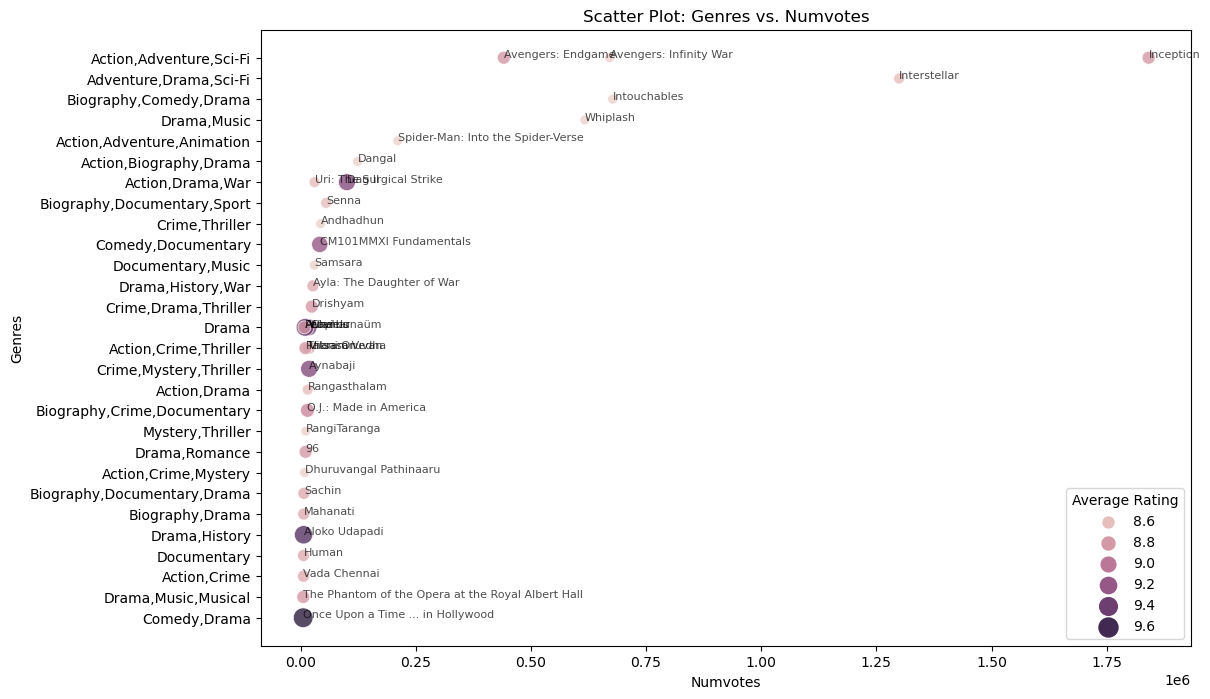

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot for genres and numvotes
plt.figure(figsize=(12, 8))
sns.scatterplot(x='numvotes', y='genres', hue='averagerating', size='averagerating', sizes=(50, 200), data=combined_df, alpha=0.8)

# Annotate points with movie titles
for i, row in combined_df.iterrows():
    plt.annotate(row['original_title'], (row['numvotes'], row['genres']), fontsize=8, alpha=0.7)

plt.title('Scatter Plot: Genres vs. Numvotes')
plt.xlabel('Numvotes')
plt.ylabel('Genres')
plt.legend(title='Average Rating')
plt.show()


#### I'll also need to understand what are the average domestic gross of a typical movie 

In [10]:
# Calculate the average 'domestic_gross'
average_domestic_gross = bom_movie_gross['domestic_gross'].mean()

# Round to 2 decimal places and format as currency
formatted_average_domestic_gross = "${:,.2f}".format(round(average_domestic_gross, 2))

# Display the result
print("Average Domestic Gross:", formatted_average_domestic_gross)

Average Domestic Gross: $28,745,845.07


#### I found that the Average Domestic Gross of a movie: = `USD $28,745,845.07`

c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

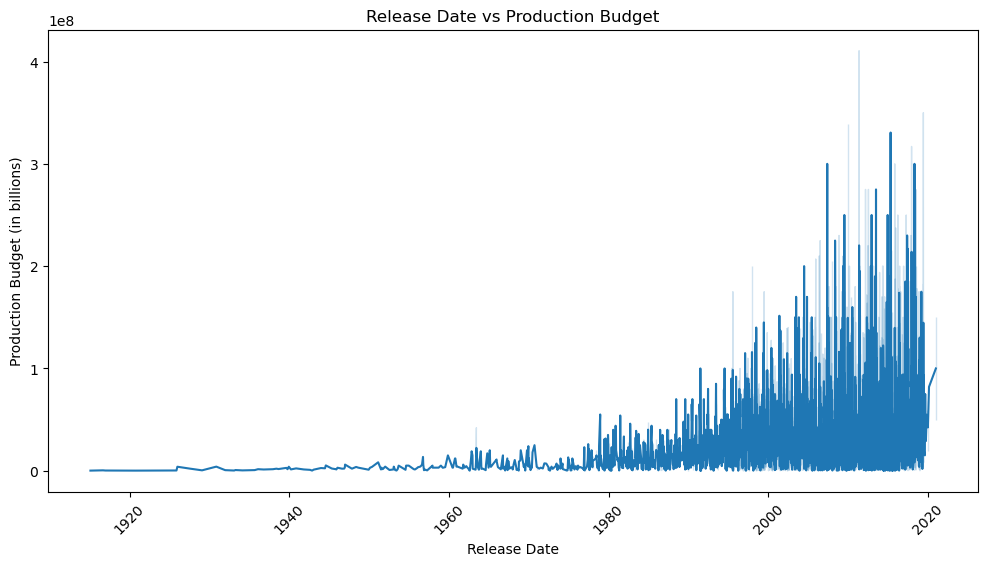

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the movie budgets data
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Convert 'production_budget' column to numeric
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'].replace('[\$,]', '', regex=True))

# Convert 'release_date' column to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Sort the data by release date
movie_budgets = movie_budgets.sort_values(by='release_date')

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='production_budget', data=movie_budgets)
plt.title('Release Date vs Production Budget')
plt.xlabel('Release Date')
plt.ylabel('Production Budget (in billions)')
plt.xticks(rotation=45)
plt.show()


In [11]:

# Find the top 10 movies with the largest 'domestic_gross'
top_10_movies = bom_movie_gross.nlargest(10, 'domestic_gross')

# Display the result
print(top_10_movies)

                             title studio  domestic_gross foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0       1,131.6  2015
3080                 Black Panther     BV     700100000.0     646900000  2018
3079        Avengers: Infinity War     BV     678800000.0       1,369.5  2018
1873                Jurassic World   Uni.     652300000.0       1,019.4  2015
727          Marvel's The Avengers     BV     623400000.0     895500000  2012
2758      Star Wars: The Last Jedi     BV     620200000.0     712400000  2017
3082                 Incredibles 2     BV     608600000.0     634200000  2018
2323  Rogue One: A Star Wars Story     BV     532200000.0     523900000  2016
2759   Beauty and the Beast (2017)     BV     504000000.0     759500000  2017
2324                  Finding Dory     BV     486300000.0     542300000  2016


In [12]:
# Filter movies with the name "Star Wars"
star_wars_movies = bom_movie_gross[bom_movie_gross['title'].str.contains('Star Wars', case=False, na=False)]

# Sort the Star Wars movies by income (domestic_gross)
sorted_star_wars_movies = star_wars_movies.sort_values(by='domestic_gross', ascending=False)

# Display the result
print(sorted_star_wars_movies)

                                                  title studio  \
1872                       Star Wars: The Force Awakens     BV   
2758                           Star Wars: The Last Jedi     BV   
2323                       Rogue One: A Star Wars Story     BV   
3101                            Solo: A Star Wars Story     BV   
793   Star Wars: Episode I - The Phantom Menace (in 3D)    Fox   

      domestic_gross foreign_gross  year  
1872     936700000.0       1,131.6  2015  
2758     620200000.0     712400000  2017  
2323     532200000.0     523900000  2016  
3101     213800000.0     179200000  2018  
793       43500000.0      59300000  2012  


c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

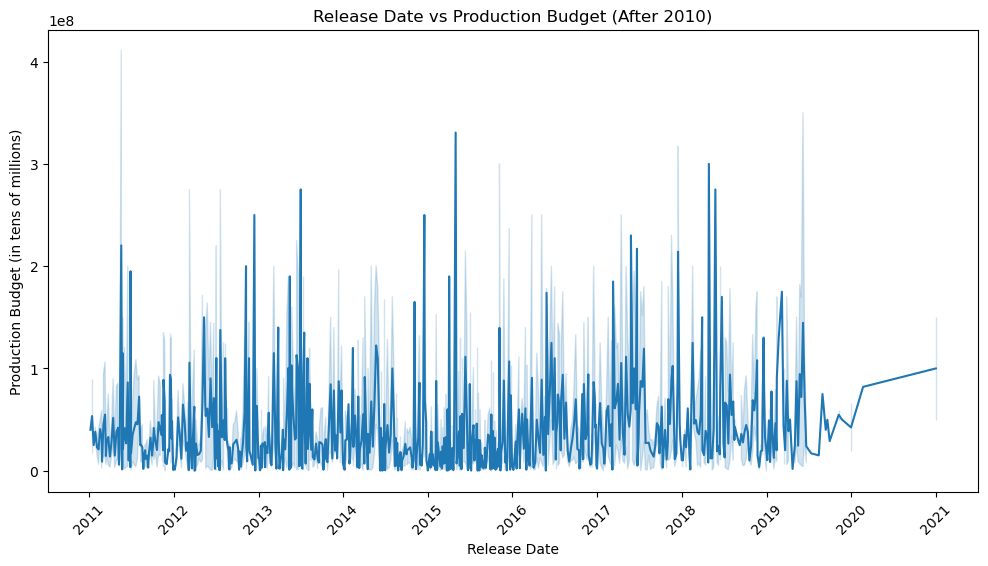

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the movie budgets data
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Convert 'production_budget' column to numeric
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'].replace('[\$,]', '', regex=True))

# Convert 'release_date' column to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Filter data for release_date after 2010
movie_budgets_after_2010 = movie_budgets[movie_budgets['release_date'].dt.year > 2010]

# Sort the filtered data by release date
movie_budgets_after_2010 = movie_budgets_after_2010.sort_values(by='release_date')

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_date', y='production_budget', data=movie_budgets_after_2010)
plt.title('Release Date vs Production Budget (After 2010)')
plt.xlabel('Release Date')
plt.ylabel('Production Budget (in tens of millions)')
plt.xticks(rotation=45)
plt.show()





c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PeteD\anaconda3\envs\learn-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

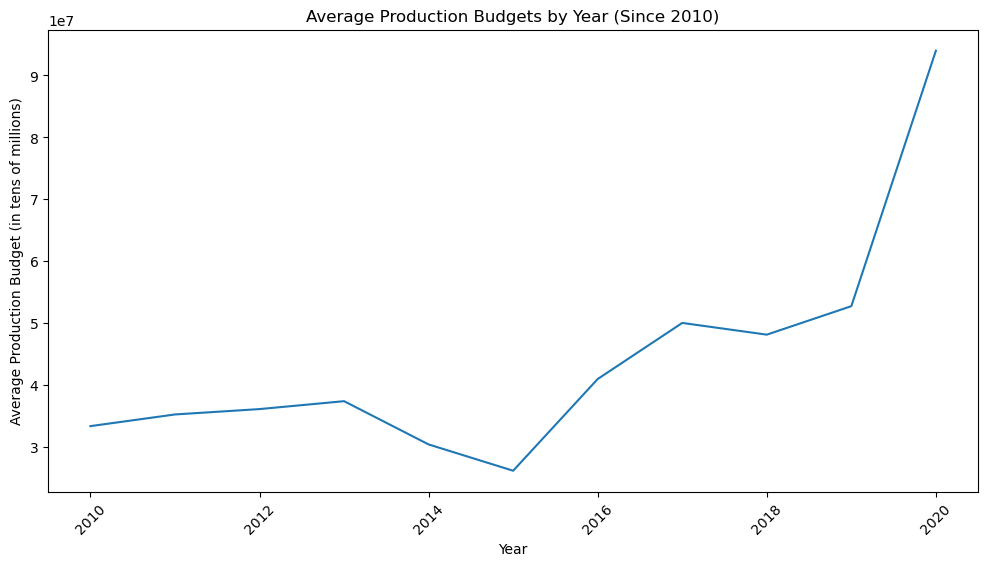

In [45]:

# Read the movie budgets data
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Convert 'production_budget' column to numeric
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'].replace('[\$,]', '', regex=True))

# Convert 'release_date' column to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Filter data for release_date after 2010
movie_budgets_after_2010 = movie_budgets[movie_budgets['release_date'].dt.year >= 2010]

# Group data by year and calculate the average production budget
average_budgets_by_year = movie_budgets_after_2010.groupby(movie_budgets_after_2010['release_date'].dt.year)['production_budget'].mean()

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_budgets_by_year.index, y=average_budgets_by_year.values)
plt.title('Average Production Budgets by Year (Since 2010)')
plt.xlabel('Year')
plt.ylabel('Average Production Budget (in tens of millions)')
plt.xticks(rotation=45)
plt.show()


#### Here is the trend for the average movie production budgets as we see the trend is getting higher and the average budget for a blockbuster now `exceeds 90 Million USD`

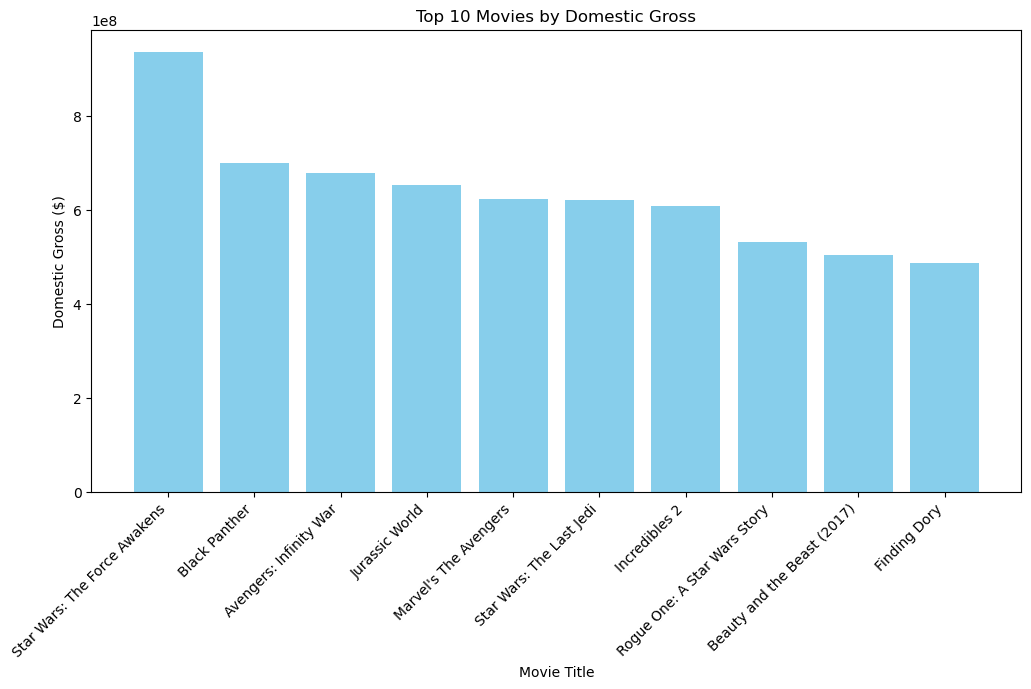

In [18]:
import matplotlib.pyplot as plt


# domestic gross data
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies['title'], top_10_movies['domestic_gross'], color='skyblue')
plt.title('Top 10 Movies by Domestic Gross')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross ($)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


Here is info on the top ten movies using the criteria on my dataframe

In [29]:
combined_query3 = """
SELECT mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres,
       mr.averagerating, mr.numvotes, d.person_id, p.primary_name AS director_name
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
JOIN directors d ON mb.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
WHERE mr.averagerating >= 8.5 AND mr.numvotes >= 5000
ORDER BY mr.numvotes DESC, mr.averagerating DESC
LIMIT 50;
"""


combined_df3 = pd.read_sql(combined_query, imdb_conn)

pd.read_sql(combined_query3, imdb_conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,director_name
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,nm0634240,Christopher Nolan
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,nm0634240,Christopher Nolan
3,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0619923,Olivier Nakache
4,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0619923,Olivier Nakache
5,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0619923,Olivier Nakache
6,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0865918,Éric Toledano
7,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0865918,Éric Toledano
8,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0865918,Éric Toledano
9,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,nm0751577,Anthony Russo


In [31]:
combined_query3 = """
SELECT DISTINCT mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres,
       mr.averagerating, mr.numvotes, d.person_id, p.primary_name AS director_name
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
JOIN directors d ON mb.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
WHERE mr.averagerating >= 8.5 AND mr.numvotes >= 5000
ORDER BY mr.numvotes DESC, mr.averagerating DESC
LIMIT 50;
"""

# Use pandas to read the results into a DataFrame
combined_df3 = pd.read_sql(combined_query3, imdb_conn)

# Display the DataFrame
print(combined_df3)

pd.read_sql(combined_query3, imdb_conn)


     movie_id                                      primary_title  \
0   tt1375666                                          Inception   
1   tt0816692                                       Interstellar   
2   tt1675434                                   The Intouchables   
3   tt1675434                                   The Intouchables   
4   tt4154756                             Avengers: Infinity War   
5   tt4154756                             Avengers: Infinity War   
6   tt2582802                                           Whiplash   
7   tt4154796                                  Avengers: Endgame   
8   tt4154796                                  Avengers: Endgame   
9   tt4633694                  Spider-Man: Into the Spider-Verse   
10  tt4633694                  Spider-Man: Into the Spider-Verse   
11  tt4633694                  Spider-Man: Into the Spider-Verse   
12  tt5074352                                             Dangal   
13  tt5813916                                   

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,director_name
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,nm0634240,Christopher Nolan
2,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0619923,Olivier Nakache
3,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343,nm0865918,Éric Toledano
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,nm0751577,Anthony Russo
5,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,nm0751648,Joe Russo
6,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",8.5,616916,nm3227090,Damien Chazelle
7,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,nm0751577,Anthony Russo
8,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,nm0751648,Joe Russo
9,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",8.5,210869,nm0709056,Peter Ramsey


#### Here I try to find out which `top directors` Microsoft Movie Studio's should hire for their new venture

In [39]:
combined_query3_director_name = """
SELECT DISTINCT p.primary_name AS director_name
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
JOIN directors d ON mb.movie_id = d.movie_id
JOIN persons p ON d.person_id = p.person_id
WHERE mr.averagerating >= 8.5 AND mr.numvotes >= 5000
ORDER BY mr.numvotes DESC, mr.averagerating DESC
LIMIT 50;
"""

# Use pandas to read the results into a DataFrame
combined_df3_director_name = pd.read_sql(combined_query3_director_name, imdb_conn)

# Display the DataFrame
print(combined_df3_director_name)

pd.read_sql(combined_query3_director_name, imdb_conn)

                director_name
0           Christopher Nolan
1             Olivier Nakache
2               Éric Toledano
3             Damien Chazelle
4               Anthony Russo
5                   Joe Russo
6                Peter Ramsey
7              Rodney Rothman
8             Bob Persichetti
9               Nitesh Tiwari
10               Alper Caglar
11               Asif Kapadia
12            Sriram Raghavan
13               Murat Dündar
14                Aditya Dhar
15                 Ron Fricke
16                  Can Ulkay
17              Jeethu Joseph
18              Nadine Labaki
19                    Gayatri
20                    Pushkar
21     Amitabh Reza Chowdhury
22             Donavon Warren
23              Tim Gagliardo
24                    Sukumar
25               Ezra Edelman
26                 Mohan Raja
27              Anup Bhandari
28              C. Prem Kumar
29                  Ram Kumar
30                        Ram
31        Anjana Krishnakumar
32        

,director_name
0,Christopher Nolan
1,Olivier Nakache
2,Éric Toledano
3,Damien Chazelle
4,Anthony Russo
5,Joe Russo
6,Peter Ramsey
7,Rodney Rothman
8,Bob Persichetti
9,Nitesh Tiwari
